# Facebook Checkin Prediction
## Udacity Machine Learning Nanodegree Capstone Project

## Data Import

In [1]:
%matplotlib inline
# Import Libraries

import numpy as np
import pandas as pd

# Clear memory on initialize
test_df = None
train_df = None
train_data = None
test_data = None
formatted_feature_df = None
reduced_data = None
formatted_reduced_data = None


# Import Data
train_data = pd.read_csv("data/train.csv")
print "Training data loaded successfully"
print len(train_data)


Training data loaded successfully
29118021


## Data Formatting and Transformation

In [2]:
# Reduce the data to coordinate sets, minimum of 0.0 maximum of 10.0, this reduces overall working dataset size while
# maintaining neighbor relationships.

min_x = 0.0
max_x = 10.0
min_y = 0.0
max_y = 10.0

reduced_data = train_data[(train_data['x'] >= min_x) & (train_data['x'] <= max_x) & (train_data['y'] >= min_y) & (train_data['y'] <= max_y)]

# Remove csv import from Memory
train_data = None

# Cursory validation that data is imported properly
print reduced_data.head()

   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949


In [3]:
#remove original import if all data formatting is complete to save memory if necessary
train_data = None
test_data = None

## Statistics and Visualization
This section will provide basic statistic and graphical representations of the data correlated to the report section of the same name.

### Basic information about the dataset

In [4]:
# Run diagnostics after import

print "Training Data Length: " + str(len(reduced_data.index))


# Basic Statistics
print "\nUnique places in training set: " + str(reduced_data.place_id.nunique())
print "\nUnique X coordinates in training set: " + str(reduced_data.x.nunique())
print "\nMinimum and Maximum X coordiante: " + str(reduced_data.x.min()) + " " + str(reduced_data.x.max())
print "\nUnique Y coordinates in training set: " + str(reduced_data.y.nunique())
print "\nMinimum and Maximum Y coordiante: " + str(reduced_data.y.min()) + " " + str(reduced_data.y.max())
print "\nUnique timestamps in training set: " + str(reduced_data.time.nunique())
print "\nMinimum timestamp in training set: " + str(reduced_data.time.min())
print "\nMaximum timestamp in training set: " + str(reduced_data.time.max())
print "\nUnique accuracy measures in training set: " + str(reduced_data.accuracy.nunique())

Training Data Length: 29118021

Unique places in training set: 108390

Unique X coordinates in training set: 100001

Minimum and Maximum X coordiante: 0.0 10.0

Unique Y coordinates in training set: 100001

Minimum and Maximum Y coordiante: 0.0 10.0

Unique timestamps in training set: 786239

Minimum timestamp in training set: 1

Maximum timestamp in training set: 786239

Unique accuracy measures in training set: 1025


### Feature reformatting
In this section, features such as time will be reformatted to more useful formats as discussed in the associated report.

In this case, the time will be reduced from completely linear, into a Day of the Week, Hour of the Day formatted as 0-6 for the day and 0-23 for the hour and split into two columns

In [5]:
from pandas import *
def SetDay(x):
    x = float(x)
    day_of_week = x/(60*24*7) - int(x/(60*24*7))
    day_exact = day_of_week*7
    day = int(day_exact)
    hour_exact = (day_exact - day)*24
    hour = int(hour_exact)
    return day, hour

reduced_data["day"], reduced_data["hour"] = zip(*reduced_data["time"].map(SetDay))

print reduced_data.head()

   row_id       x       y  accuracy    time    place_id  day  hour
0       0  0.7941  9.0809        54  470702  8523065625    4    21
1       1  5.9567  4.7968        13  186555  1757726713    3    13
2       2  8.3078  7.0407        74  322648  1137537235    0     1
3       3  7.3665  2.5165        65  704587  6567393236    6     7
4       4  4.0961  1.1307        31  472130  7440663949    5    20


### Graphical Representation of the Dataset

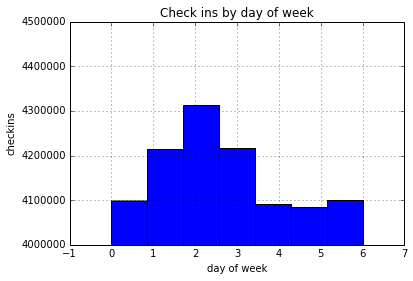

In [6]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# the histogram of the data
plt.hist(reduced_data['day'], 7)


plt.xlabel('day of week')
plt.ylabel('checkins')
plt.title('Check ins by day of week')
plt.axis([-1, 7, 4000000, 4500000])
plt.grid(True)
plt.show()

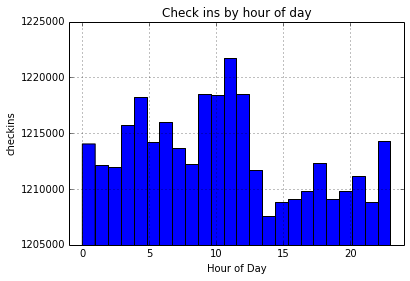

In [7]:
plt.hist(reduced_data['hour'], 24)


plt.xlabel('Hour of Day')
plt.ylabel('checkins')
plt.title('Check ins by hour of day')
plt.axis([-1, 24, 1205000, 1225000])
plt.grid(True)
plt.show()

### Sample data and plot in x,y space

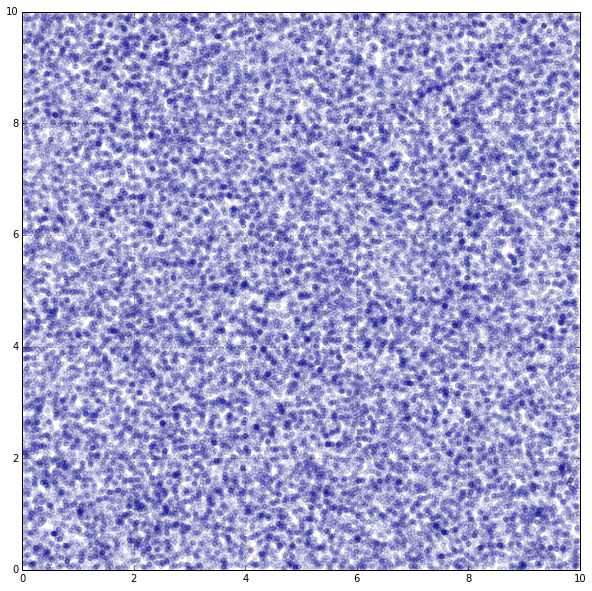

In [8]:
sample_data = reduced_data.sample(n=50000)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(sample_data["x"], sample_data["y"], marker = "o", alpha=0.1)
plt.axis([0,10,0,10])
plt.grid(True)
plt.show()

### Explore Accuracy

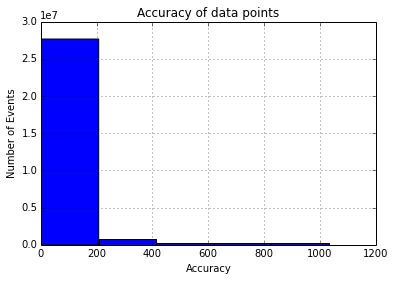

In [9]:
plt.hist(reduced_data['accuracy'], 5)


plt.xlabel('Accuracy')
plt.ylabel('Number of Events')
plt.title('Accuracy of data points')
plt.grid(True)
plt.show()

#### Notes on Accuracy
Without any information as to what "accuracy" really means in the context of this problem, it has to be assumed that it is related to GPS accuracy down to some measurement. It is my belief that a lower number would mean that the GPS signal is more accurate, whether it be accounted for in this problem or not which would be unrelated to a person's behavior and would only serve to create a "noisy" GPS signal. With that in mind, there are two methods for proceeding, one would be to ignore the accuracy metric entirely, second would be to filter out accuracy metrics that fell outside of some statistical measurement. For this problem I will take data within one standard deviation of the mean and disregard all others.

### Statistical Analysis of the Dataset

From the previous section it is apparent that there is very little variation in checkin behavior by GPS coordinate, by time of the day, or by day of the week. The plot of x,y data does reveal local concentrations which could be considered to be "popular" check-in spots. Since the check-in ID's are simply randomly assigned values, statistical analysis of those values would be mostly meaningless. From this point it is apparent that this is a very difficult machine learning problem with no obvious patterns or data concentrations.

The only statistical analysis that will be done on this problem will be to filter the accuracy metric.

By my estimation, basic statistical measurements on this dataset other than accuracy will not reveal anything. I will proceed to the machine learning portion of this report after filtering the accuracy metrics. 

In [10]:
average = np.mean(reduced_data['accuracy'])
standard_dev = np.std(reduced_data['accuracy'])
minimum_accuracy = average - standard_dev
maximum_accuracy = average + standard_dev
print "Average Accuracy " + str(average)
print "\nStandard Deviation " + str(standard_dev)
print "\nMinimum Accuracy " + str(minimum_accuracy)
print "\nMaximum Accuracy " + str(maximum_accuracy)

Average Accuracy 82.8491249457

Standard Deviation 114.751770383

Minimum Accuracy -31.9026454374

Maximum Accuracy 197.600895329


## Final Data Formatting
Remove original timestamps, analyze accuracy measures and filter data.

In [11]:
formatted_reduced_data = reduced_data[reduced_data.accuracy <= maximum_accuracy]
formatted_reduced_data = formatted_reduced_data.drop('time', 1)
formatted_reduced_data = formatted_reduced_data.drop('accuracy', 1)
print formatted_reduced_data.head()
reduced_data = None

   row_id       x       y    place_id  day  hour
0       0  0.7941  9.0809  8523065625    4    21
1       1  5.9567  4.7968  1757726713    3    13
2       2  8.3078  7.0407  1137537235    0     1
3       3  7.3665  2.5165  6567393236    6     7
4       4  4.0961  1.1307  7440663949    5    20


In [12]:
print len(formatted_reduced_data)

27510341


In [24]:
# Select Sample Size for ML Algorithms

sample_size = 100000
sample_set = formatted_reduced_data.sample(n=sample_size)

In [25]:
feature_sample = sample_set[['x', 'y', 'day', 'hour']]
target_sample = sample_set['place_id']

# Change index on DataFrame
feature_sample_df = pd.DataFrame(feature_sample, index=sample_set['row_id'], columns=['x','y','hour','day'])
target_sample_df = pd.DataFrame(target_sample, index=sample_set['row_id'], columns=['place_id'])


print feature_sample_df.head()
print target_sample_df.head()

               x       y  hour  day
row_id                             
21346371  3.3397  1.2860     7    1
24528046  8.4613  3.2685    23    5
6574737   5.6236  3.7603    20    2
25685507  8.7496  0.7785     8    0
2225057   8.5128  1.4512    18    4
            place_id
row_id              
21346371  8232948182
24528046  3451536023
6574737   7261433350
25685507  3421623360
2225057   6145344698


## Machine Learning Algorithms and Testing

In [26]:
## Modified Chunk of code from Brad Miller's (my) ML Nanodegree Project 2

# First, decide how many training vs test samples you want
num_all = feature_sample_df.shape[0]  


# set testing set size in percentage
testing_set_percentage = 0.2


#set testing set size (in number of data points as a float) and the number of training sets
testing_set_size = round(len(sample_set)*testing_set_percentage)
num_training_sets = 10
training_set_total = len(sample_set) - testing_set_size
training_size_iterator = training_set_total/num_training_sets
    
from sklearn.cross_validation import train_test_split

# initiate iterator for loop
i = 1

# instantiate empty dict for data
complete_data = {}

while i <= num_training_sets:
    training_set_size = i*training_size_iterator
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(
        feature_sample_df, target_sample_df, test_size=float(testing_set_size)/len(sample_set), train_size = float(training_set_size)/len(sample_set), random_state=41)
    
    dataset_list = [X_train_iter, y_train_iter, X_test_iter, y_test_iter]
    complete_data[str(int(training_set_size))] = dataset_list
    i+=1
    
# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
print "Training set: {} samples".format(complete_data[str(int(training_set_size))][0].shape[0])
print "Test set: {} samples".format(complete_data[str(int(training_set_size))][2].shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 80000 samples
Test set: 20000 samples


### K Neighbors Baseline
Create a baseline using K Nearest Neighbors with 1 neighbor. 

!!! Skip if Not Baselining Dataset !!!





In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
import time
from sklearn import cross_validation
neigh = KNeighborsClassifier(n_neighbors=1)
# revise_y_train_iter = np.ravel(y_train_iter)
# unique_targets = target_sample_df.place_id.unique()
# binary_target = label_binarize(np.ravel(target_sample_df), unique_targets)
start = time.time()
neigh.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)
import os
os.system('say "your code has finished training"')

Done!
Training time (secs): 0.008


0

In [20]:
start = time.time()
print neigh.score(X_test_iter, np.ravel(y_test_iter))
end = time.time()
print "Done!\nTesting time (secs): {:.3f}".format(end - start)
import os
os.system('say "your code has finished validating"')

0.0045
Done!
Testing time (secs): 0.173


0

### Naive Bayes 
Test gaussian naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
start = time.time()
NBclf.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)
os.system('say "your code has finished training"')

Done!
Training time (secs): 17.852


0

In [ ]:
start = time.time()
print NBclf.score(X_test_iter, np.ravel(y_test_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)
os.system('say "your code has finished validating"')